# Исследование рынка общественного питания в Москве

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import requests
import json

In [2]:
try:
    data = pd.read_csv(--)
except:
    data = pd.read_csv('/datasets/rest_data.csv')

## Предобработка данных

In [3]:
data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [4]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()

In [7]:
data.loc[:, 'object_name':'number'].duplicated().sum()

85

In [8]:
data = data.drop_duplicates(['object_name','chain','object_type','address','number'])

In [9]:
data

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город москва, поселение московский, киевское ш...",36


In [10]:
data.loc[:, 'object_name':'number'].duplicated().sum()

0

In [11]:
data.duplicated().sum()

0

## Анализ данных

### Количество заведений

In [12]:
object_type = data.groupby('object_type', as_index=False).agg({'id': 'count'}).sort_values('id', ascending=True)

In [13]:
fig = px.bar(
    object_type, x='id', y='object_type', title='Количество заведений', orientation='h'
)
fig.update_traces(hovertemplate = 'Количество заведений: %{x}')
fig.update_xaxes(tickangle=45)
fig.show() 

Лидером по количеству заведений являются кафе, за ним следуют столовые рестораны и фастфуд.

Выделим в отдельные столбцы улицу, номер дома, и город.

In [14]:
list = []

def address_street(line):
    i = 0
    global list
    strip = line.split(',')
    if ('город москва' in (strip[0])) and ('город' not in (strip[1])) and ('поселение' not in (strip[1])) and ('посёлок' not in (strip[1])):
        list = strip[1]      
    return list

In [15]:
def street_number(line):
    global list
    i = 0
    strip = line.split(',')
    if ('город москва' in (strip[0])) and ('город' not in (strip[1])) and ('поселение' not in (strip[1])) and ('посёлок' not in (strip[1])):
        list = strip[2]
    return list

In [16]:
def city(line):
    global list
    i = 0
    strip = line.split(',')
    if ('город москва' in (strip[0])) and ('город' not in (strip[1])) and ('поселение' not in (strip[1])) and ('посёлок' not in (strip[1])):
        list = strip[0]   
    return list

In [17]:
data['city'] = data['address'].apply(city)
data['street_number'] = data['address'].apply(street_number)
data['streetname'] = data['address'].apply(address_street)

C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [18]:
data.head()

,id,object_name,chain,object_type,address,number,city,street_number,streetname
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,город москва,дом 9,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,город москва,дом 2/1,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,город москва,дом 6,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,город москва,дом 1,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,город москва,дом 9,абрамцевская улица


In [19]:
data_moscow = data[(~data['address'].str.contains("поселение"))] 
data_moscow = data_moscow[(~data_moscow['address'].str.contains("городок"))]
data_moscow = data_moscow[(~data_moscow['address'].str.contains("посёлок"))]

data_moscow['country'] = 'Россия'
data_moscow['req_address'] = data_moscow['streetname']+ ','\
    + data_moscow['street_number'] + ','\
    + data_moscow['city'] + ','\
    + data_moscow['country']

Напишем функцию для получения координат через API

In [20]:

def geo(elem):
    parameters = {
    'key' : 'My Key',
    'location' : elem
    }

    response = requests.get('http://www.mapquestapi.com/geocoding/v1/address',
                           params = parameters)

    address = json.loads(response.text)['results']
    
    lat = (address[0]['locations'][0]['latLng']['lat'])
    lng = (address[0]['locations'][0]['latLng']['lng'])
    
    
    return lat, lng
    

Получим координаты и сохраним их. Ячейку закоментируем для того чтобы избежать повторного запроса.

In [21]:
'''req_address = data_moscow['req_address'].apply(geo)
req_address = pd.DataFrame(req_address.tolist())

req_address.columns = ['latitude','longtitude']
data_moscow['latitute'] = req_address['latitude']
data_moscow['longtitude'] = req_address['longtitude']

data_moscow.to_csv('moscow_geo_address.csv', sep=',', header=True)
'''

"req_address = data_moscow['req_address'].apply(geo)\nreq_address = pd.DataFrame(req_address.tolist())\n\nreq_address.columns = ['latitude','longtitude']\ndata_moscow['latitute'] = req_address['latitude']\ndata_moscow['longtitude'] = req_address['longtitude']\n\ndata_moscow.to_csv('moscow_geo_address.csv', sep=',', header=True)\n"

Загрузим готовый датасет из облака. 

In [22]:
moscow_geo_address = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.by/d/fKquFD3_cHUd6Q')
moscow_geo_address = moscow_geo_address.rename(columns={'latitute': 'latitude'})
del moscow_geo_address['Unnamed: 0']

### Сетевые заведения

In [23]:
chain = data.groupby('chain', as_index=False).agg({'id': 'count'})
chain['chain'] = ['сетевые','не сетевые']

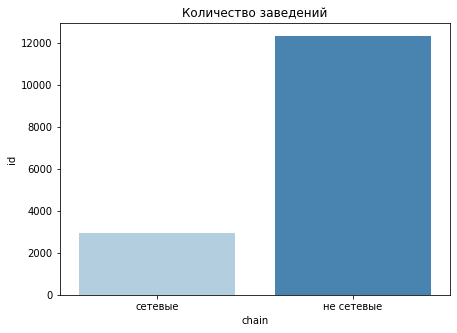

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(data=chain, x='chain', y='id', palette='Blues')
plt.title('Количество заведений')
plt.show()

Сетевых заведений почти в 6 раз меньше.

In [25]:
data_chain = data.query('chain == "да"')
chain_object_type = data_chain.groupby('object_type', as_index=False).agg({'id': 'count'})
chain_object_type = chain_object_type.sort_values('id')

In [26]:
mapbox_token = 'pk.eyJ1Ijoic2Fibmlrb2xhZXZpY2giLCJhIjoiY2t2ZmdsdjhnM3B3cDJvbHV2OW9jbXc3eCJ9.KW-Fg6jjevLALG_BTmzN4Q'

px.set_mapbox_access_token(mapbox_token)
df = moscow_geo_address
fig = px.scatter_mapbox(df, lat="latitude", lon="longtitude",
                        hover_name="object_name",
                        hover_data=['address','object_type'],
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10,
                        color = 'chain'
                       )
fig.update_layout(mapbox_style="dark")
fig.show()

In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=chain_object_type['object_type'],
    x=chain_object_type['id'],
    name='Сетевые',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=object_type['object_type'],
    x=object_type['id'],
    name='Не сетевые',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')
fig.show()

In [28]:
object_type = chain_object_type.merge(object_type, on='object_type')
object_type = object_type.rename(columns={'id_x': 'chain', 'id_y': 'unchain'})

In [29]:
object_type['ratio'] = ((object_type['chain'] / object_type['unchain']) * 100).round()
object_type = object_type.sort_values('ratio', ascending=True)

In [30]:
fig = px.bar(
    object_type, x='ratio', y='object_type', hover_data=['chain','unchain'], title='Процент сетевых заведений', orientation='h'
)
fig.update_traces(hovertemplate = 'Процент сетевых заведений: %{x}%')
fig.show() 

Сетевыми чаще всего являются кафе, фастфуд и рестораны. Однако сетевой тип наиболее характкрен для фастфуда.

### Количество мест в сетевых заведения

In [31]:
chain_object = data_chain.groupby('object_name', as_index=False).agg({'id': 'count', 'number': 'median'})
chain_object.columns = ['object_name', 'count', 'median_numbers']

In [32]:
fig = px.scatter(chain_object, x='median_numbers', y='count',
                marginal_x='histogram', marginal_y='rug',
                template = 'plotly_white',
                color='count',
                opacity=0.4)
fig.update_layout(yaxis_title = 'Количество заведений',
                  xaxis_title = 'Количество мест',)
fig.update_traces(hovertemplate = 'Количество заведений: %{y} <br>Количество мест: %{x}')

fig.show()

In [33]:
chain_number = data_chain.groupby('object_type', as_index=False).agg({'number': 'mean'})
chain_number = chain_number.sort_values('number')

In [34]:
fig = px.box(chain_number, y="number", points='all')
fig.show()

Для сетевых заведений наиболее характерно около 40 рабочих мест и 5 заведений.

In [35]:
chain_number

,object_type,number
5,магазин (отдел кулинарии),8.679487
4,кафетерий,12.269231
1,буфет,12.727273
2,закусочная,14.375000
6,предприятие быстрого обслуживания,40.319797
3,кафе,47.426934
0,бар,53.027027
7,ресторан,100.362799
8,столовая,112.333333


In [36]:
fig = px.bar(
    chain_number, x='number', y='object_type', title='Количество мест', orientation='h'
)
fig.update_traces(hovertemplate = 'Среднее количество мест: %{x}')
fig.update_xaxes(tickangle=45)
fig.show() 

больше всего посадочных мест в столовых и ресторанах.

### Улицы с наибольшем количеством заведений

In [37]:
moscow = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Qh7o8jvZZjmZYQ')
moscow['streetname'] = moscow['streetname'].str.lower()

In [38]:
moscow_streets = data.groupby('streetname', as_index=False).agg({'id': 'count'}).reset_index(drop=True)

In [39]:
moscow_streets = moscow_streets.sort_values('id', ascending=False)
top_10_street = moscow_streets.head(10)

In [40]:
top_10_street.sort_values('id', ascending=False)

,streetname,id
999,пресненская набережная,391
1038,проспект мира,204
1042,профсоюзная улица,181
688,ленинградский проспект,174
415,варшавское шоссе,167
691,ленинский проспект,158
1035,проспект вернадского,128
809,мясницкая улица,119
679,кутузовский проспект,118
605,каширское шоссе,112


In [41]:
top_10_street['streetname'] = top_10_street['streetname'].str.strip()
top_10_street = top_10_street.merge(moscow[['area','streetname']], on='streetname').copy()

C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
top_street_area = top_10_street.groupby('streetname', as_index=False).agg({'id': 'unique', 'area': 'unique'})
top_street_area['id'] = top_street_area['id'].astype('int')
top_street_area = top_street_area.sort_values('id')

In [43]:
pd.set_option("max_colwidth", 400)

<a id='s1'> </a>

In [44]:
top_street_area

,streetname,id,area
1,каширское шоссе,112,"[Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное]"
2,кутузовский проспект,118,"[Район Дорогомилово, Район Фили-Давыдково]"
5,мясницкая улица,119,"[Басманный район, Красносельский район]"
7,проспект вернадского,128,"[Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район]"
4,ленинский проспект,158,"[Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка]"
0,варшавское шоссе,167,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово]"
3,ленинградский проспект,174,"[Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол]"
9,профсоюзная улица,181,"[Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан]"
8,проспект мира,204,"[Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район]"
6,пресненская набережная,391,[Пресненский район]


In [45]:
fig = px.bar(
    top_street_area, x='id', y='streetname', text='area', title='Количество заведений', orientation='h'
)
fig.update_traces(hovertemplate = 'Улица: %{y}<br>Количество заведений: %{x}<br>Районы: %{text}')
fig.update_xaxes(tickangle=45)
fig.show() 

Наибольшее количество заведений на Пресненской набережной (394)

### Улицы с одним заведением

In [46]:
reverse_top = moscow_streets[moscow_streets['id'] == 1].copy()
reverse_top['streetname'] = reverse_top['streetname'].str.strip()
reverse_top = reverse_top.merge(moscow[['streetname','area']], on='streetname', )

<a id='s2'> </a>

In [47]:
print('Количество улиц с одним заведением: ',reverse_top['id'].sum())

Количество улиц с одним заведением:  540


### Районы в которых находятся улицы с одним заведением

In [48]:
one_area = pd.DataFrame(reverse_top['area'].unique())
one_area.columns = ['area']

Получим координаты районов в которых находятся эти улицы.

In [49]:
'''
geo_area = one_area['area'].apply(geo)

geo_area = pd.DataFrame(geo_area.tolist())

geo_area.columns = ['latitude','longtitude']
one_area['latitute'] = geo_area['latitude']
one_area['longtitude'] = geo_area['longtitude']

one_area.to_csv('one_area_geo.csv', sep=',', header=True)
'''

"\ngeo_area = one_area['area'].apply(geo)\n\ngeo_area = pd.DataFrame(geo_area.tolist())\n\ngeo_area.columns = ['latitude','longtitude']\none_area['latitute'] = geo_area['latitude']\none_area['longtitude'] = geo_area['longtitude']\n\none_area.to_csv('one_area_geo.csv', sep=',', header=True)\n"

In [50]:
one_area = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.by/d/75XfiiYnEC2MOQ')
del one_area['Unnamed: 0']
one_area = one_area.rename(columns={'latitute': 'latitude'})

In [51]:
one_area.head(3)

,area,latitude,longtitude
0,Рязанский район,55.721209,37.770625
1,Район Якиманка,55.738306,37.616901
2,Район Преображенское,55.796342,37.723873


In [52]:
px.set_mapbox_access_token(mapbox_token)
df = one_area
fig = px.scatter_mapbox(df, lat="latitude", lon="longtitude",
                        hover_name="area",
                        size_max=15,
                        zoom=10,
                        )
fig.update_layout(mapbox_style="dark")
fig.show()

In [53]:
one_area[['area']].duplicated().sum()

0

In [54]:
pd.options.display.max_rows = 999
one_area[['area']]

,area
0,Рязанский район
1,Район Якиманка
2,Район Преображенское
3,Район Хорошево-Мневники
4,Даниловский район
5,Район Солнцево
6,Красносельский район
7,Район Фили-Давыдково
8,Район Аэропорт
9,Нижегородский район


### Количество посадочных мест на улицах с большим количеством заведений

In [55]:
data['streetname'] = data['streetname'].str.strip()
data_top_10 = data.query('streetname in @top_10_street.streetname')

C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
data_top_10.head(3)

,id,object_name,chain,object_type,address,number,city,street_number,streetname
151,155973,кафе «андерсон»,да,кафе,"город москва, варшавское шоссе, дом 2",150,город москва,дом 2,варшавское шоссе
152,23618,кафе «subway»,да,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,город москва,дом 7,варшавское шоссе
153,155852,кафе «ламаджо»,нет,кафе,"город москва, варшавское шоссе, дом 29",30,город москва,дом 29,варшавское шоссе


In [57]:
df = data_top_10[['number']]
fig = px.box(df, y="number", points='all')
fig.show()

In [58]:
top_10_number = data_top_10.groupby('object_type', as_index=False).agg({'number': 'median'}).sort_values('number')

In [59]:
top_10_number

,object_type,number
5,магазин (отдел кулинарии),1
2,закусочная,3
4,кафетерий,8
6,предприятие быстрого обслуживания,10
1,буфет,20
3,кафе,30
0,бар,37
7,ресторан,80
8,столовая,100


In [60]:
fig = px.bar(
    top_10_number, x='number', y='object_type', title='Количество заведений на популярных улицах', orientation='h'
)
fig.update_traces(hovertemplate = 'Количество заведений: %{x}')
fig.show() 

Мы можем заметить что мест меньше чем в среднем по городу.

In [61]:
df = data_top_10[data_top_10['object_type'] == 'кафе'][['number']]
px.box(df, y='number')

Медианное количество посадочных мест 37, при этом в 75% процентах случаев в заведениях до 70 мест. В столовых, ресторанах, барах и кафе по 100, 80, 37 и 30 мест соответственно.

## Вывод

Самыми популярными форматами  заведений являются: кафе, столовые, рестораны и фастфуд, 6099, 2587, 2285 и 1923 соответственно.
Формат кафе выбранный нами является самым популярным, их в два с половиной раза больше(6099 против 2587) чем второго самого популярного типа заведений, столовых.

Так же мы виим что сетевых заведений почти в 6 раз меньше. При этом самыми популярными сетевыми заведениями также являются кафе, фастфуд и рестораны, 1396,791 и 544 заведений соответственно. Это может нам сказать о том что эти заведения рентабельны. 

Для сетевых заведений наиболее характерно около 40 посадочных мест и 5 заведений.
По количеству посадочных мест лидируют столовые и рестораны, 112 и 100 мест соответственно. В кафе в среднем 47 посадочных мест.

Наибольшее количество заведений на Пресненской набережной (394), однако самым оптимальным выбором являются улицы с высокой проходимостью, так как больше людей узнают о заведении естественным образом а так же после того как идея перестанет быть новинкой люди врятли поедут далеко для того чтобы поесть. Следственно лучше расположить его рядом с другими заведениями, так как люди изначально выбирают улицы с большим количеством заведений чтобы иметь выбор. Плюс из-за меньшего количества персонала могут упасть операционные расходы, что даёт конкурентное преимущество перед другими заведениями на улицах с большой проходимостью и соответственно более высокой арендой.  
Подходящими районами являются Бассманный и Красносельский. Близость к центру, туристическим местам таких как Чистые пруды а так же большая проходимость на таких улицах как Покровская и Мясницкая.  Так же большое количество бизнесс-центров вблизи поможет удерживать выручку на должном уровне по будням. Оптимальным количеством посадочных мест от 25 до 35.



Презентация : https://disk.yandex.by/i/xemMEu0ehxU64A